In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
### Step 1: Load data and create masks

def load_rating(fname, N=943, M=1682):
    ''' load rating file with the format: UserID::MovieID::Rating::Timestamp
    Can be used with MovieLens100K & MovieLens1M
    Params:
        - fname: file name
        - N: number of users
        - M: number of items (e.g. movies)
    '''
    R = np.zeros((N, M))
    with open(fname, 'r') as fin:
        lines = fin.readlines()
        for line in lines:
            splt = line.strip().split('\t')
            uid = int(splt[0]) - 1
            mid = int(splt[1]) - 1
            r = float(splt[2])
            R[uid,mid] = r
    return R

# load training and testing sets
data_train = load_rating("u1.base")
data_test = load_rating("u1.test")

n_users_train, n_movies_train = data_train.shape
n_users_test, n_movies_test = data_test.shape

# create mask matrix
def create_mask(X):
    mask = np.ones(X.shape)
    mask[X == 0] = 0
    return mask

In [3]:
### Step 2: Implement functions to calculate cost and gradients
# This function computes the cost that we want to minimize
def compute_cost(U, V, R, _lambda, M):
    ''' 
    Inputs: 
        U: A matrix contains users' feature
        V: A matrix contains movies' feature
        R: A matrix contains ground truth (size: n_movies x n_users)
        _lambda: Regularization weight
        mask: The binary mask matrix
    Output:
        loss: (scalar) the mean square error over known elements in R
    '''
    assert U.shape[1] == V.shape[1]
    assert U.shape[0]== R.shape[0]
    assert V.shape[0] == R.shape[1]
    assert R.shape == M.shape
    
    elem1 = np.sum(M * ((np.matmul(U,V.T) - R) ** 2)) / np.sum(M)
    elem2 = _lambda*np.sum(U ** 2)
    elem3 = _lambda*np.sum(V ** 2)
    
    return 1/2*(elem1 + elem2 + elem3)

# This function computes partial derivatives of the cost function w.r.t. movie and user features
def compute_gradient(U, V, R, _lambda, M):
    ''' 
    Inputs: 
        U: A matrix contains users' feature
        V: A matrix contains movies' feature
        R: A matrix contains ground truth (size: n_movies x n_users)
        _lambda: Regularization weight
        mask: The binary mask matrix
    Output:
        grad_U: gradients of the cost function w.r.t. U, must have the same shape as U
        grad_V: gradients of the cost function w.r.t. U, must have the same shape as V
    '''
    assert U.shape[1] == V.shape[1]
    assert U.shape[0] == R.shape[0]
    assert V.shape[0] == R.shape[1]
    assert R.shape == M.shape
    
    grad_u = np.matmul(((np.matmul(U,V.T) - R) * M), V) + _lambda * U
    grad_v = np.matmul(np.transpose((np.matmul(U,V.T) - R) * M), U) + _lambda * V
    
    return (grad_u, grad_v)

Final training cost : 0.808008


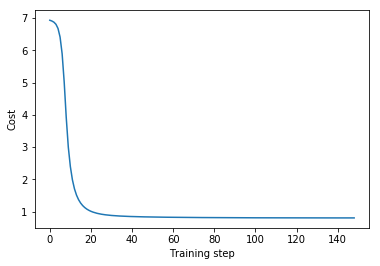

In [12]:
### Step 3: Training
n_features = 10
# randomly initialize U and V 
U = 0.25 * np.random.randn(n_users_train, n_features)
V = 0.25 * np.random.randn(n_movies_train, n_features)
# regularization weight
_lambda = 0.0001
# learning rate
alpha = 0.001
# number of training iteration
training_iterations = 150

costs = np.zeros(training_iterations)
mask = create_mask(data_train)
counter = 0
while counter < training_iterations:
    # perform one step of training
    # you shoud also print out some immediate results during the training for debugging purpose
    costs[counter] = compute_cost(U, V, data_train, _lambda, mask)
    
    (gradient_u, gradient_v) = compute_gradient(U, V, data_train, _lambda, mask)
    U -= alpha * gradient_u
    V -= alpha * gradient_v

    counter += 1 
    
print('Final training cost : %f' %compute_cost(U, V, data_train, _lambda, mask))
plt.plot(costs[1:])
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

In [5]:
# Step 4: Evaluation function 
def RMSE(A, B, mask):
    ''' Root mean square error 
    '''
    return mean_squared_error(A*mask, B*mask)*np.size(A)/np.count_nonzero(mask)
    
    
def MAE(A, B, mask):
    ''' Mean absolute error
    '''
    return mean_absolute_error(A*mask, B*mask)*np.size(A)/np.count_nonzero(mask)

In [6]:
### Step 5: Evaluate the model
# make prediction
prediction = np.matmul(U,V.T)

# Compute RMSE and MAE on the training set
print("RMSE_train: ", RMSE(data_train, prediction, mask))
print("MAE_train: ", MAE(data_train, prediction, mask))

# Compute RMSE and MAE on the testing set
mask_test = create_mask(data_test)
print("RMSE_test: ",RMSE(data_test, prediction, mask_test))
print("MAE_test: ",MAE(data_test, prediction, mask_test))

RMSE_train:  0.615790481635
MAE_train:  0.618534403074
RMSE_test:  0.979422138725
MAE_test:  0.771523566159
